In [1]:
import matplotlib.pyplot as plt
import random
from cellularautomata import ca_image, next_row, elementary_ca_rule

%matplotlib inline

# Computing in the Small
## Week 5 Cellular Automata
This week we look at [cellular automata](https://math.hws.edu/eck/js/edge-of-chaos/CA-info.html).  A one-dimensional cellular automaton (CA) consists of a row of “cells,” where each cell can be in one of several “states.” Imagine these cells as squares, with each state represented as a number from $0,..., k - 1$.

A fixed rule dictates how the states of these cells change from one generation to the next. Specifically, the state of a cell in the next generation depends only on its current state and the states of its $r$ immediate neighbors.

In what follows, we take the simplified case where $k$ is 2 (the state is either $0$ or $1$) and we look at the *immediate* neighbors, $r = 1$.

Cellular automata are a rich field of study and they were the subject of a doctoral dissertation for one of your instructors.

As one example we take the function that represents adding the left and right neighbor mod 2 or equivalently taking the bitwise XOR.  For reasons we will go into more depth about later, this function which could have been written:

```
def rule90(x, y, z):
    return (x + z) % 2
```

or alternatively

```
def rule90(x, y, z):
    return x ^ z
```

The following program will accept any rule number between $0$ and $255$.

(-0.5, 80.5, 39.5, -0.5)

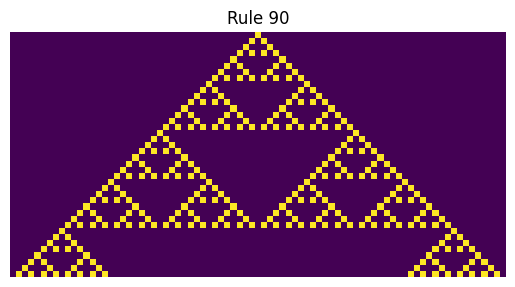

In [2]:
def rule90(x, y, z):
    return (x + z) % 2

plt.title(f"Rule 90")
plt.imshow(ca_image(rule90, gen=40), interpolation="none")
plt.axis("off")

Let's analyze what is happening piece by piece.  First the call to `imshow` is a way to visualize a matrix of $0$'s and $1$'s represented as a list of lists.  The logic is all contained in the Python function `ca_image`.  The argument `interpolation="none"` is necessary to make sure that the plot only shows $0$'s or $1$'s and does not introduce any values in between.

For example, let us sonsider the rule that simply updates every square with the value in the square to its left.

In [3]:
def shift(x, y, z):
    return x

We can explicitly print out a few generations and see what happens.

In [4]:
ca_image(shift, gen=10)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

It is sometimes helpful to see what happens to a random starting condition.  For this purpose we have another parameter to `ca_image` called `random_init`.

In [5]:
ca_image(shift, gen=10, random_init=True)

[[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]]

Here are three rules that all depend on the function $$i + j \mod 2$$
which generates Pascal's Triangle modulo $2$.

The three rules are:
```
def rule60(x, y, z):
    return (x + y) % 2
```

```
def rule90(x, y, z):
    return (x + z) % 2
```

```
def rule102(x, y, z):
    return (y + z) % 2
```

In each case the function ignores one of the three inputs.  Rules $60$ and $102$ grow the triangle to the right and left respectively.  Rule $90$ is interesting because in each row the even positons in one generation depend solely on what was in the odd positions in the previous generation which you can think of as being lik ethe red and black squares on a chessboard.

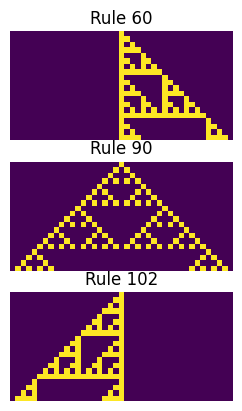

In [6]:
RULES = [60, 90, 102]

for i, r in enumerate(RULES):
    plt.subplot(3, 1, i+1)
    plt.title(f"Rule {r}")
    plt.imshow(ca_image(elementary_ca_rule(r), gen=20), interpolation="none")
    plt.axis("off")

As we discussed in a previous lecture, Pascal's triangle has a fast way to compute what happens even at really high numbers of iterations.  However, this is not true for all cellular automata.  Rule $30$, for example, gives rise even from a simple starting state to a seemingly random set of values if we look at the values at the central square:

(-0.5, 100.5, 49.5, -0.5)

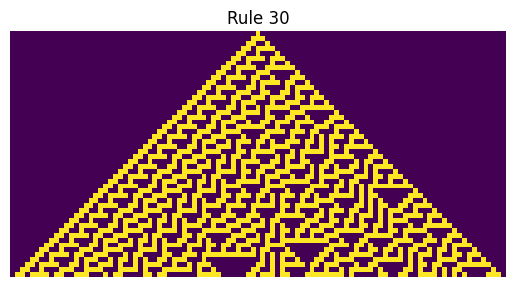

In [7]:
plt.title(f"Rule 30")
plt.imshow(ca_image(elementary_ca_rule(30), gen=50), interpolation="none")
plt.axis("off")

Here we generate the matrix of $0$'s and $1$'s and make a list of just the center values, which we then plot to illustrate the lack of a discernible pattern.

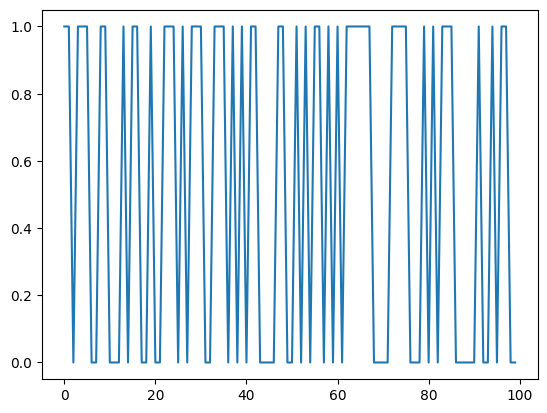

In [8]:
rule30 = ca_image(elementary_ca_rule(30), gen=100)
center = [row[100] for row in rule30]

plt.plot(center)

One particularly important elementary cellular automaton is rule $110$ defined by: 

In [9]:
def rule110(x, y, z):
    return (y | z) ^ (x & y & z)

Here is rule $110$ operating on a single cell, and then operating on a random initial condition.

(-0.5, 800.5, 399.5, -0.5)

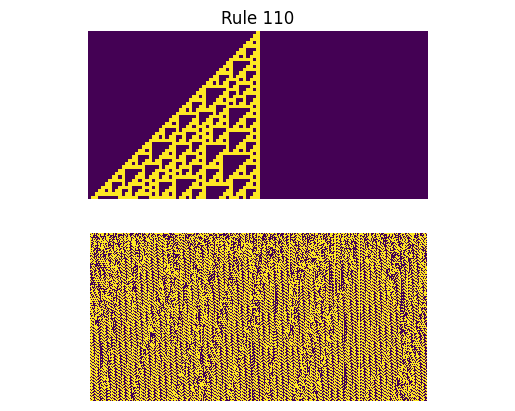

In [10]:
plt.title(f"Rule 110")
plt.axis("off")
plt.subplot(2, 1, 1)
plt.imshow(ca_image(rule110, gen=50), interpolation="none")

plt.axis("off")
plt.subplot(2, 1, 2)
plt.imshow(ca_image(rule110, gen=400, random_init=True), interpolation="none")
plt.axis("off")

In the paper [Universality in Elementary Cellular Automata](https://wpmedia.wolfram.com/sites/13/2018/02/15-1-1.pdf), Matthew Cook presents a proof of a conjecture by Stephen Wolfram that Rule $110$ is capable of uninversal computation.  He quotes Marvin Minsky as describing a universal system as being a "...completely general instruction-obeying mechanism."  Put another way, any computer program we could want to run can be written as an initial sequence for his cellular automaton and the results of running the program can be derived from subsequent generations.  To bring things full circle, this property is also shared by Post Tag systems and by systems like the Collatz function.